Blake Green

CS 5344.001

# 1. Traceroute Numeric Plot

The first graph visualizes the traceroute data by plotting the numeric values of the IP addresses for each hop. Here's how you can interpret the graph:

- **X-Axis (Hop Number):** This represents the number of hops (or routers) that the traceroute packet passes through on its way to the destination. Each hop corresponds to a router or network device in the path from your machine to the destination.
  
- **Y-Axis (Numeric IP Address):** The Y-axis shows the numeric value of the IP address for each hop. IP addresses are converted to their numeric form (a 32-bit integer) for visualization. This helps differentiate between various IP addresses and allows comparison across different traceroutes.

- **Lines for Each Target:** Each target is represented by a line on the graph. The number of hops varies depending on the network infrastructure between your machine and the target server. The lines help you understand how many hops each destination required to be reached and how the numeric IP addresses evolve over time (each hop corresponds to a new router or intermediary node in the network).

### Interpreting the Plot:
- If a hop appears multiple times across the lines of different targets, it suggests that these targets share a common router or network node.
- The steeper slopes or clustering of points could indicate areas where network traffic is heavy or network routing decisions cause more congestion or delays.
- If some hops show missing values or timeouts (common in traceroutes), it suggests that some routers don't respond to traceroute requests, which is often due to security or configuration settings blocking the probes.

---

# 2. Traceroute Network Graph

The `result.graph()` generates a graphical representation of the traceroute data in the form of a network graph. In this graph:

- **Nodes:** Each node represents a router or intermediary device encountered on the path to the destination.
  
- **Edges:** The edges (connections) between the nodes represent the path or the hop between devices.

### Interpreting the Graph:
- The network graph shows how the traceroute data connects different devices. This can help you visualize the network structure and see where packets are passing through various nodes.
- It also provides insights into whether there are multiple paths to the destination or if there is a bottleneck or a single route.
- By observing which nodes are central or connected to multiple targets, you can gain insights into the network’s topology.



Received 139 packets, got 118 answers, remaining 22 packets
   104.17.176.119:tcp80 142.250.115.147:tcp80 146.75.106.114:tcp80 163.195.1.225:tcp80 23.215.55.54:tcp80 34.242.126.108:tcp80 74.6.231.20:tcp80  
1  192.168.1.1     11   192.168.1.1     11    192.168.1.1     11   192.168.1.1     11  192.168.1.1     11 192.168.1.1     11   192.168.1.1     11 
2  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
3  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
5  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
6  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
7  35.146.117.31   11   35.146.117.31   11    35.146.117.

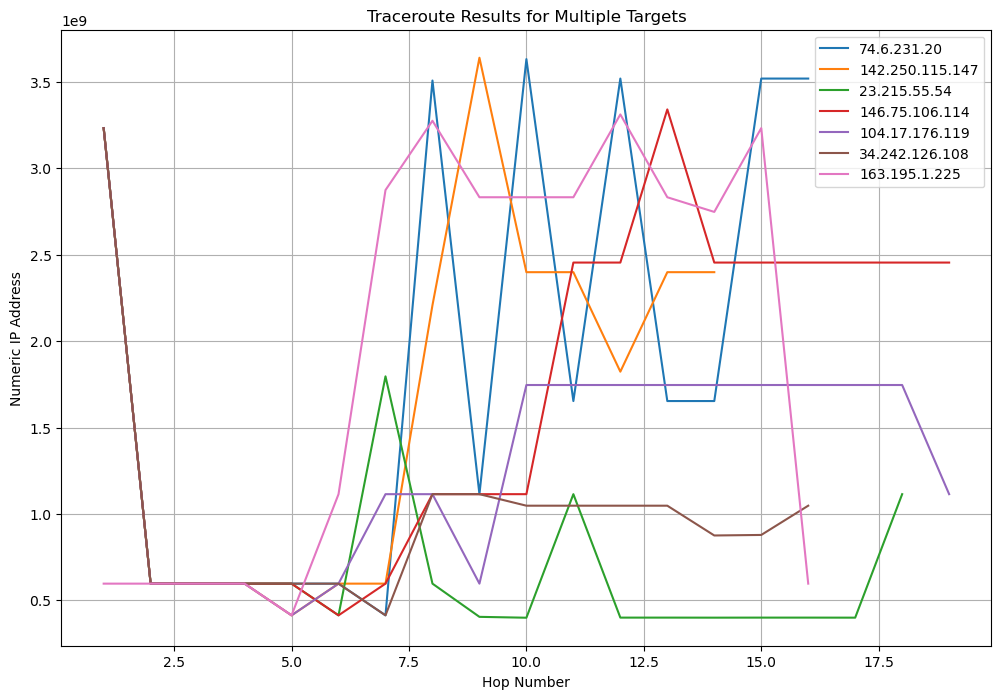

City: None, Country: United States

Received 145 packets, got 120 answers, remaining 20 packets
   104.17.176.119:tcp80 142.250.115.147:tcp80 146.75.106.114:tcp80 163.195.1.225:tcp80 23.215.55.54:tcp80 34.242.126.108:tcp80 74.6.231.20:tcp80  
1  192.168.1.1     11   192.168.1.1     11    192.168.1.1     11   192.168.1.1     11  192.168.1.1     11 192.168.1.1     11   192.168.1.1     11 
2  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
3  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
5  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
6  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
7  35.146.117.31   11 

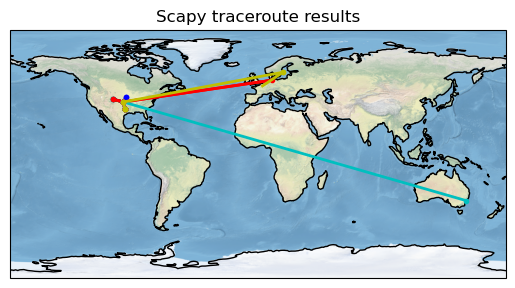

In [3]:
from scapy.all import traceroute, conf
import matplotlib.pyplot as plt
import geoip2.database
import socket

geoip_path = "C:\\Users\\blake\\Downloads\\GeoLite2-City.mmdb"
conf.geoip_city = geoip_path

# Step 1: Perform traceroutes for multiple destinations (use IP addresses for consistency)
targets = ["74.6.231.20", "142.250.115.147", "23.215.55.54", "146.75.106.114", "104.17.176.119", "34.242.126.108", "163.195.1.225"]  # Example IPs for Yahoo, Google, Bing, Ask
result, unans = traceroute(targets, maxttl=20, retry=2, timeout=2)

hop_data = {}
for target in targets:
    hop_data[target] = []
    for snd, rcv in result:
        if snd.dst == target:
            hop_data[target].append(rcv.src)

# Convert IP addresses to numeric values
def ip_to_numeric(ip):
    try:
        return int.from_bytes(socket.inet_aton(ip), 'big')
    except OSError:
        return 0  # Fallback for invalid IPs

# Plotting traceroute hops
plt.figure(figsize=(12, 8))
for target, hops in hop_data.items():
    numeric_hops = [ip_to_numeric(ip) for ip in hops]
    plt.plot(range(1, len(hops) + 1), numeric_hops, label=target)

plt.xlabel('Hop Number')
plt.ylabel('Numeric IP Address')
plt.title('Traceroute Results for Multiple Targets')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

result.graph()

# Test GeoIP database
try:
    reader = geoip2.database.Reader(geoip_path)
    response = reader.city("8.8.8.8")  # Test with a known IP
    print(f"City: {response.city.name}, Country: {response.country.name}")
except Exception as e:
    print(f"GeoIP database issue: {e}")
finally:
    reader.close()

# Perform traceroutes for multiple destinations
targets = ["74.6.231.20", "142.250.115.147", "23.215.55.54", "146.75.106.114", "104.17.176.119", "34.242.126.108", "163.195.1.225"]   # Example IPs
result, unans = traceroute(targets, maxttl=20, retry=2, timeout=2)

# Debug traceroute results
print("Traceroute results:")
result.show()

# Generate world map
try:
    print("Generating world map...")
    result.world_trace()
except Exception as e:
    print(f"Error generating world map: {e}")


# 1. Map Overview

- **World Map:** The map is centered on the world, with zoom level 2, showing the entire globe. Each hop in the traceroute from your machine to the target destination will be plotted as a point on this map based on its geographic location (latitude and longitude).
  
- **Zoom and Interactivity:** The map is interactive. You can zoom in to see individual hops more clearly or zoom out to view the entire path across continents.

---

# 2. Hop Markers

- **Markers:** Each hop in the traceroute path is represented by a blue marker on the map. These markers correspond to the IP addresses encountered along the route, which are resolved to their respective cities and countries using the GeoIP database.

- **Popups:** When you click on a marker, a popup will appear, showing the following information:
  - **IP Address:** The IP address of the hop.
  - **City:** The city associated with the hop (if found).
  - **Country:** The country associated with the hop (if found).
  - **Latitude and Longitude:** Geographic coordinates of the hop’s location.

---

# 3. Interpreting the Geographic Data

- **Geographic Distribution:** The markers represent physical locations where the data packets stop or are routed through. By examining the distribution of these markers, you can infer:
  - How geographically far the hops are from each other: A traceroute may span several countries or continents depending on the network infrastructure.
  - **Major Internet Hubs:** Hops located in major cities or near known network hubs indicate central locations in global network infrastructure.
  - **Local vs Global Pathways:** If a traceroute primarily involves hops in a specific country or region, it indicates a local network path. On the other hand, if the hops span multiple continents, it suggests that the packet is being routed through global network infrastructure.

---

# 4. Interpreting Specific Patterns

- **Hops in a Single Region:** If multiple hops are clustered in one region (e.g., within the U.S. or Europe), this suggests that the packet stays within a particular geographic area for an extended period before reaching its destination.
  
- **Long-Distance Hops:** If the hops span long distances across continents (e.g., from North America to Europe or Asia), this indicates that the packet might pass through international links, often influenced by internet peering agreements and routing decisions.

- **Missing or Inaccurate Locations:** If a hop’s latitude and longitude are (0, 0), it means that the geographic information could not be resolved for that IP. This could occur if the IP address is not listed in the GeoIP database or if the server doesn’t provide location information.


In [5]:
from scapy.all import traceroute, conf
import geoip2.database
import socket
import folium
from geopy.geocoders import Nominatim
import webbrowser

def resolve_to_location(ip, reader):
    """Resolve an IP address to its geographic location."""
    try:
        response = reader.city(ip)
        return (
            response.city.name or "Unknown",
            response.country.name or "Unknown",
            response.location.latitude,
            response.location.longitude
        )
    except Exception as e:
        print(f"Failed to resolve IP {ip}: {e}")
        return "Unknown", "Unknown", None, None  # Use None for invalid lat/lon

# Path to GeoLite2 database
geoip_path = "C:\\Users\\blake\\Downloads\\GeoLite2-City.mmdb"

# Step 1: Perform traceroutes for multiple destinations (use IP addresses for consistency)
targets = ["74.6.231.20", "142.250.115.147", "23.215.55.54", "146.75.106.114", "104.17.176.119", "34.242.126.108", "163.195.1.225"]  # Example IPs for Yahoo, Google, Bing, Ask
result, unans = traceroute(targets, maxttl=20, retry=2, timeout=2)

# Step 2: Extract hop information for each target
hop_data = {}
for target in targets:
    hop_data[target] = []
    for snd, rcv in result:
        if snd.dst == target:
            hop_data[target].append(rcv.src)

# Step 3: Convert IPs to geographic locations using GeoIP database
geo_data = {}
with geoip2.database.Reader(geoip_path) as reader:
    for target, hops in hop_data.items():
        geo_data[target] = []
        for hop in hops:
            city, country, lat, lon = resolve_to_location(hop, reader)
            geo_data[target].append((hop, city, country, lat, lon))

# Step 4: Create a map centered on a general location (e.g., the world)
m = folium.Map(location=[20, 0], zoom_start=2)

# Step 5: Add markers to the map for each hop
for target, hops in geo_data.items():
    for hop, city, country, lat, lon in hops:
        # Add a marker only if lat and lon are valid
        if lat is not None and lon is not None and lat != 0 and lon != 0:
            folium.Marker(
                location=[lat, lon],
                popup=f"IP: {hop}\nCity: {city}\nCountry: {country}",
                icon=folium.Icon(color='blue')
            ).add_to(m)
        else:
            print(f"Skipping invalid location for hop: {hop}, lat: {lat}, lon: {lon}")

# Step 6: Save and display the map
map_path = "traceroute_map.html"
m.save(map_path)
print(f"Map has been saved to {map_path}")

# Optionally, open the map in the browser (uncomment the line below)
webbrowser.open(map_path)

# Debugging information
print("Geographic Data for Traceroutes:")
for target, hops in geo_data.items():
    print(f"Target: {target}")
    for hop, city, country, lat, lon in hops:
        print(f"  Hop: {hop}, City: {city}, Country: {country}, Latitude: {lat}, Longitude: {lon}")


Received 143 packets, got 120 answers, remaining 20 packets
   104.17.176.119:tcp80 142.250.115.147:tcp80 146.75.106.114:tcp80 163.195.1.225:tcp80 23.215.55.54:tcp80 34.242.126.108:tcp80 74.6.231.20:tcp80  
1  192.168.1.1     11   192.168.1.1     11    192.168.1.1     11   192.168.1.1     11  192.168.1.1     11 192.168.1.1     11   192.168.1.1     11 
2  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
3  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
5  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
6  35.146.117.31   11   35.146.117.31   11    35.146.117.31   11   35.146.117.31   11  35.146.117.31   11 35.146.117.31   11   35.146.117.31   11 
7  35.146.117.31   11   35.146.117.31   11    35.146.117.